# Lab_05 Model Tuning

### Context
#### k-Fold Technic
- Label Postprocess->이진 분류에서 threshold 최적화

#### Two Stage Ensemble
- Stacking

#### AutoML
+ NNI

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

#### 데이터 정보

    train.csv - 의료기관이 폐업했는지 여부를 포함하여 최근 2개년의 재무정보와 병원 기본정보 
    test.csv - 폐업 여부를 제외하고 train.csv와 동일 
    sample_submission.csv - inst_id와 open과 close를 예측하는 OC 두개의 열로 구성. OC의 값은 open 예측일 경우 1, close 예측일 경우 0.



    inst_id - 각 파일에서의 병원 고유 번호
    OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함
    sido – 병원의 광역 지역 정보
    sgg – 병원의 시군구 자료
    openDate – 병원 설립일
    bedCount - 병원이 갖추고 있는 병상의 수
    instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류
    ·        종합병원 : 입원환자 100명 이상 수용 가능
    ·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능
    ·        의원 : 입원 환자 30명 이하 수용 가능
    ·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  
    revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함
    salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함
    sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함
    salary1 – 급여, 2017(회계년도)년 데이터를 의미함
    noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함
    noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함
    Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함
    ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함
    Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함
    liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함
    quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함
    receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함
    inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함
    nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함
    tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함
    OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함
    receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함
    debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함
    liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함
    shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함
    NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함
    longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함
    netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함
    surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함
    revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함
    salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함
    sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함
    salary2 – 급여, 2016(회계년도)년 데이터를 의미함
    noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함
    noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함
    interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함
    ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함
    profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함
    liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함
    quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함
    receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함
    inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함
    nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함
    tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함
    OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함
    receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함
    Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함
    liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함
    shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함
    NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함
    longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함
    netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함
    surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함
    employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함
    employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함
    ownerChange – 대표자의 변동 

In [2]:
hospital_train = join('data', join('Hospital', 'train.csv'))
hospital_test  = join('data', join('Hospital', 'test.csv'))

data = pd.read_csv(hospital_train)
label = data['OC']

test = pd.read_csv(hospital_test)

In [3]:
data.shape

(301, 58)

In [4]:
data.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [6]:
test.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


In [7]:
test.describe()

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
count,127.000000,0.0,127.000000,1.260000e+02,119.000000,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,...,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02
mean,205.905512,NaN,95.858268,2.005085e+07,172.789916,1.824446e+10,3.973321e+09,1.340410e+10,7.415084e+09,5.175513e+08,...,1.336209e+10,3.513831e+08,1.973114e+04,1.189851e+10,5.633432e+09,2.181713e+09,6.495026e+09,4.482682e+09,6.116179e+09,1.648474e+09
std,131.801765,NaN,52.684253,8.795815e+04,126.024471,3.133530e+10,1.419948e+10,2.054481e+10,1.210043e+10,1.193139e+09,...,2.085404e+10,9.791097e+08,2.206009e+05,1.971182e+10,9.662048e+09,4.952449e+09,1.203673e+10,7.517020e+09,9.813461e+09,4.779444e+09
min,2.000000,NaN,6.000000,1.976041e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.955957e+09,-8.600000e+09
25%,89.000000,NaN,51.000000,2.000083e+07,94.000000,3.235889e+09,0.000000e+00,3.083860e+09,1.666742e+09,1.641094e+07,...,2.807763e+09,0.000000e+00,0.000000e+00,1.679896e+09,3.914156e+08,0.000000e+00,1.321368e+08,0.000000e+00,9.492656e+08,0.000000e+00
50%,199.000000,NaN,95.000000,2.007107e+07,156.000000,6.637116e+09,1.896923e+08,5.716502e+09,3.263054e+09,5.319171e+07,...,5.450483e+09,3.317377e+07,0.000000e+00,4.494217e+09,1.554506e+09,3.000000e+08,2.030000e+09,1.750000e+09,2.427139e+09,0.000000e+00
75%,328.000000,NaN,144.500000,2.011790e+07,213.000000,1.704039e+10,1.192329e+09,1.445243e+10,7.198103e+09,3.714592e+08,...,1.187114e+10,2.048998e+08,0.000000e+00,1.412031e+10,6.586241e+09,2.650000e+09,5.700000e+09,4.857048e+09,5.881965e+09,6.935165e+08
max,431.000000,NaN,177.000000,2.017053e+07,771.000000,1.810000e+11,1.160000e+11,1.270000e+11,8.239561e+10,7.302719e+09,...,1.130000e+11,7.112780e+09,2.466393e+06,1.310000e+11,5.241427e+10,3.714334e+10,7.855654e+10,3.620288e+10,4.924492e+10,2.561787e+10


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

In [9]:
pd.isna(data).sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


2주차 강의에서 사용한 전처리 코드를 그대로 가져와 사용하겠습니다.

#### 전처리

In [10]:
# 발생한 에러처리
test['employee1'] = test['employee1'].map(lambda x: x.replace(',', '') if isinstance(x, str) else x)
test['employee2'] = test['employee2'].map(lambda x: x.replace(',', '') if isinstance(x, str) else x)

# 자료형 변경
test['employee1'] = test['employee1'].astype(np.float64)
test['employee2'] = test['employee2'].astype(np.float64)

##### 클래스 분포 확인
- 해당 데이터는 극심한 클래스가 불균형한 데이터셋 입니다. 이런 데이터의 경우 Open으로 찍어버리면 거의 95%의 정확도가 나옵니다.

In [11]:
(data['OC'] == 'open').sum(), (data['OC'] == ' close').sum()

(286, 15)

##### 불필요한 컬럼 삭제
- openDate는 병원이 개업한 년월일로 실제로는 중요한 변수일 수 있으나, 우리 강의가 데이터 전처리에 치중된 강의가 아니므로 일단은 제거하겠습니다.
- 일반적으로 년월일은 1년 단위 또는 10년 단위로 범주형 변수로 만들어 전처리합니다.

In [12]:
data.drop(columns=['OC', 'inst_id', 'openDate'], inplace=True)
test.drop(columns=['OC', 'inst_id', 'openDate'], inplace=True)

##### 수치형 변수 컬럼 및 범주형 변수 컬럼

In [13]:
# DF.info에서 Object type을 가진 컬럼은 모두 범주형 변수
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O'] 
num_columns = [c for c in data.columns if c not in cat_columns]
print('Categorical Columns: \n{}\n\n Numeric Columns: \n{}\n'.format(cat_columns, num_columns))

Categorical Columns: 
['sido', 'instkind', 'ownerChange']

 Numeric Columns: 
['sgg', 'bedCount', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1', 'employee2']



#### 라벨 데이터 인코딩

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
label = le.fit_transform(label)

#### 전처리 프로세스 함수로 만들기

In [15]:
def preprocess(x_train, x_valid, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_valid = x_valid.copy()
    tmp_x_test  = x_test.copy()
    
    # 결측치 처리
    tmp_x_train = tmp_x_train.reset_index(drop=True)
    tmp_x_valid = tmp_x_valid.reset_index(drop=True)
    tmp_x_test  = tmp_x_test.reset_index(drop=True)
    
    x_train_mean = np.mean(tmp_x_train[num_columns], axis=0)
    x_train_mode = tmp_x_train[cat_columns].mode()
    
    for c in num_columns:
        # x_train의 평균 값으로 x_train, x_valid 수치형 변수 결측치 처리
        tmp_x_train.loc[pd.isna(tmp_x_train[c]), c] =  x_train_mean[c]
        tmp_x_valid.loc[pd.isna(tmp_x_valid[c]), c] =  x_train_mean[c]
        tmp_x_test.loc[pd.isna(tmp_x_test[c]), c]   =  x_train_mean[c]
    
    for c in cat_columns:
        # x_train의 최빈 값으로 x_train, x_valid 범주형 변수 결측치 처리
        tmp_x_train.loc[pd.isna(tmp_x_train[c]), c] =  x_train_mode[c][0]
        tmp_x_valid.loc[pd.isna(tmp_x_valid[c]), c] =  x_train_mode[c][0]
        tmp_x_test.loc[pd.isna(tmp_x_test[c]), c]   =  x_train_mode[c][0]
        
    
    # 스케일링
    x_train_mean = np.mean(tmp_x_train[num_columns], axis=0)
    x_train_std  = np.std(tmp_x_train[num_columns], axis=0)

    tmp_x_train.loc[:, num_columns] = (tmp_x_train[num_columns] - x_train_mean) / (x_train_std + 1e-4)
    tmp_x_valid.loc[:, num_columns] = (tmp_x_valid[num_columns] - x_train_mean) / (x_train_std + 1e-4)
    tmp_x_test.loc[:, num_columns] = (tmp_x_test[num_columns] - x_train_mean) / (x_train_std + 1e-4)
        
    # 인코딩, 추가된 코드. data와 test의 범주형 변수 unique 값 리스트 이런식으로 작성하면 3개를 합칠 필요가 없음
    ohe = OneHotEncoder(sparse=False)
    x_all = pd.concat([tmp_x_train[cat_columns], 
                       tmp_x_valid[cat_columns], 
                       tmp_x_test[cat_columns]], axis=0)

    new_x_all = ohe.fit_transform(x_all)

    ohe_columns = ohe.categories_[0].tolist() + ohe.categories_[1].tolist() + ohe.categories_[2].tolist()
    #이게 뭐한건지 궁금하면 2회차 강의 1시간 55분 6초 확인!!
    
    new_x_all = pd.DataFrame(new_x_all, columns=ohe_columns)

    new_x_train_cat = new_x_all.iloc[:tmp_x_train.shape[0], :]
    new_x_valid_cat = new_x_all.iloc[tmp_x_train.shape[0]:new_x_all.shape[0] - tmp_x_test.shape[0], :]
    new_x_test_cat =  new_x_all.iloc[new_x_all.shape[0] - tmp_x_test.shape[0]:, :]
    #이게 뭐한건지 궁금하면 2회차 강의 1시간 55분 6초 확인!!
    
    new_x_train_cat = new_x_train_cat.reset_index(drop=True)
    new_x_valid_cat = new_x_valid_cat.reset_index(drop=True)
    new_x_test_cat  = new_x_test_cat.reset_index(drop=True)

    tmp_x_train = tmp_x_train.drop(columns=cat_columns)
    tmp_x_valid = tmp_x_valid.drop(columns=cat_columns)
    tmp_x_test  = tmp_x_test.drop(columns=cat_columns)

    tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1)
    tmp_x_valid = pd.concat([tmp_x_valid, new_x_valid_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)
    
    return tmp_x_train, tmp_x_valid, tmp_x_test


In [16]:
from sklearn.model_selection import train_test_split

# 쪼개어진 Train, Valid 데이터의 비율은 (7:3), 내부 난수 값 2021, 데이터를 쪼갤 때 섞으며 label 값으로 Stratify 하는 코드 입니다. random_state를 주석 처리하고 데이터를 확인해보시면 계속 바뀝니다.
tmp_data, tmp_test_data, tmp_label, tmp_test_label = train_test_split(data, label, 
                                                                  test_size=0.3,
                                                                  random_state=2021,
                                                                  shuffle=True,
                                                                  stratify=label)

## k-Fold technic
### Label Postprocessing
- k-Fold를 활용하여 train 라벨에서 가장 좋은 threshold 값을 찾아, 각 라벨 생성을 최적화 할 수 있습니다.

1. train 셋에 대해서도 라벨을 모읍니다.
2. y_train, y_train_pred 값으로 최적 threshold 값을 찾습니다.(우리는 이렇게 애매한 값을 이분법으로 확실히 분류를 할 기준이 필요로 합니다. 이 기준을 바로 임계값(Threshold)라고 합니다. 로지스틱 회귀 값을 이진 카테고리에 매핑(Mapping)하려면 분류 임계값(Classification Threshold, 결정 임계값이라고도 함)을 정의해야 합니다.)
3. threshold 를 0.01 단위로 0~1 사이값을 변경해가면서 평가 지표에 대해 평가합니다.
4. 그 중 가장 높은 평가 지표를 갖는 threshold를 선택합니다.

In [17]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import f1_score

val_scores = list()
oof_train = np.zeros((tmp_data.shape[0], le.classes_.shape[0]))
oof_pred  = np.zeros((tmp_test_data.shape[0], le.classes_.shape[0]))

for i, (trn_idx, val_idx) in enumerate(skf.split(tmp_data, tmp_label)):
    x_train, y_train = tmp_data.iloc[trn_idx, :], tmp_label[trn_idx,]
    x_valid, y_valid = tmp_data.iloc[val_idx, :], tmp_label[val_idx,]
    
    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, tmp_test_data)
    
    # 모델 정의
    clf = RandomForestClassifier(random_state=2021)
    
    # 모델 학습
    clf.fit(x_train, y_train)

    # 훈련, 검증 데이터 F1 score 확인
    trn_f1 = f1_score(y_train, (clf.predict_proba(x_train)[:, 1] > 0.5).astype(np.int))
    val_f1 = f1_score(y_valid, (clf.predict_proba(x_valid)[:, 1] > 0.5).astype(np.int))
    print('{} Fold, train f1_score : {:.5f}4, validation f1_score : {:.5f}'.format(i, trn_f1, val_f1))
    
    val_scores.append(val_f1)
    
    # 여기 시점에서 x_train은 이미 전처리가 완료된 데이터이기 때문에 사용할 수 없다.
    new_x_train  = tmp_data.iloc[trn_idx, :]
    _, x_data, _ = preprocess(new_x_train, tmp_data, tmp_test_data)
    
    oof_train += clf.predict_proba(x_data) / 5
    oof_pred  += clf.predict_proba(x_test) / 5
    

# 교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.5f}'.format(np.mean(val_scores)))

# OOF temp Test F1 Score 계산하기
print('OOF Validation Score : {:.5f}'.format(f1_score(tmp_test_label, (oof_pred[:, 1] > 0.5).astype(np.int))))

0 Fold, train f1_score : 1.000004, validation f1_score : 0.95000
1 Fold, train f1_score : 1.000004, validation f1_score : 0.97561
2 Fold, train f1_score : 1.000004, validation f1_score : 0.97561
3 Fold, train f1_score : 1.000004, validation f1_score : 0.97561
4 Fold, train f1_score : 1.000004, validation f1_score : 0.97561
Cross Validation Score : 0.97049
OOF Validation Score : 0.97175


In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold

def threshold_search(y_true, y_proba):
    # 0 ~ 1 사이에서 0.01 단위로 threhold 생성
    thresholds = np.linspace(0, 1, 101) #0부터 1까지 101개의 구간을 만든다

    # 각 threshold 마다 F1 score를 측정합니다.
    f1_scores   = np.array([ f1_score(y_true, (y_proba > t).astype(np.int)) 
                             for t in thresholds ])
    best_score = np.max(f1_scores)

    # 가장 높은 F1 score를 갖는 threshold를 택합니다.
    best_th = thresholds[np.argmax(f1_scores)]
    return best_th, best_score

def scoring(y_true, y_proba, verbose=True):#y_true가 참값인 label, y_proba는 1번 class일 확률
    # 반복적으로 kFold를 진행할 수 있습니다.
    rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=20)

    scores = []
    ths = []
    for train_index, test_index in rkf.split(y_true, y_true):
        y_prob_train, y_prob_test = y_proba[train_index], y_proba[test_index]
        y_true_train, y_true_test = y_true[train_index], y_true[test_index]

        best_threshold, sc = threshold_search(y_true_train, y_prob_train)
        
        ths.append(best_threshold)
        scores.append(sc)

    # 최적 threshold들의 평균 값으로 최종 threshold를 택합니다.
    best_th = np.mean(ths)
    score = np.mean(scores)

    if verbose: print(f'Best threshold: {np.round(best_th, 4)}, Score: {np.round(score, 5)}')

    return best_th, score

In [23]:
best_th, _ = scoring(tmp_label, oof_train[:, 1])

Best threshold: 0.5258, Score: 1.0


In [24]:
print('OOF Validation Score : {:.5f}'.format(f1_score(tmp_test_label, (oof_pred[:, 1] > best_th).astype(np.int))))

OOF Validation Score : 0.97175


## Two Stage Ensemble
### Stacking
- 지난 수업에 kFold를 활용한 OOF 앙상블에 대해 학습했습니다. Stacking은 말 그대로 모델의 결과를 쌓아서 앙상블을 하는 방식입니다.
- 스태킹의 원리는, 모델이 예측한 y 값은 "실제 y 값과 매우 선형성이 높다는 점을 이용하여 y_train_pred를 변수로 사용합니다.
- y_train_pred는 모든 vaild fold의 예측 값을 합쳐서 만듭니다.

1. 우선 서로 다른 모델에 대해 y_train_pred, y_test_pred 값을 모읍니다.
2. 모은 y_train_pred 값들을 axis=1 방향으로 합친 데이터를 new_x_train이라고 하겠습니다. 
    - 당연히 y_test_pred 값들도 axis=1 방향으로 합쳐 new_x_test라고 합니다.
3. new_x_train 데이터와, y_train 데이터로 모델을 학습하고, new_x_test로 최종 y_test_pred를 예측합니다.
    - 이때 주로 2 stage 모델(meta model이라고도 부릅니다.)은 성능이 강력한 모델을 사용합니다. (사실 해봐야 xgb, lgb 입니다..)

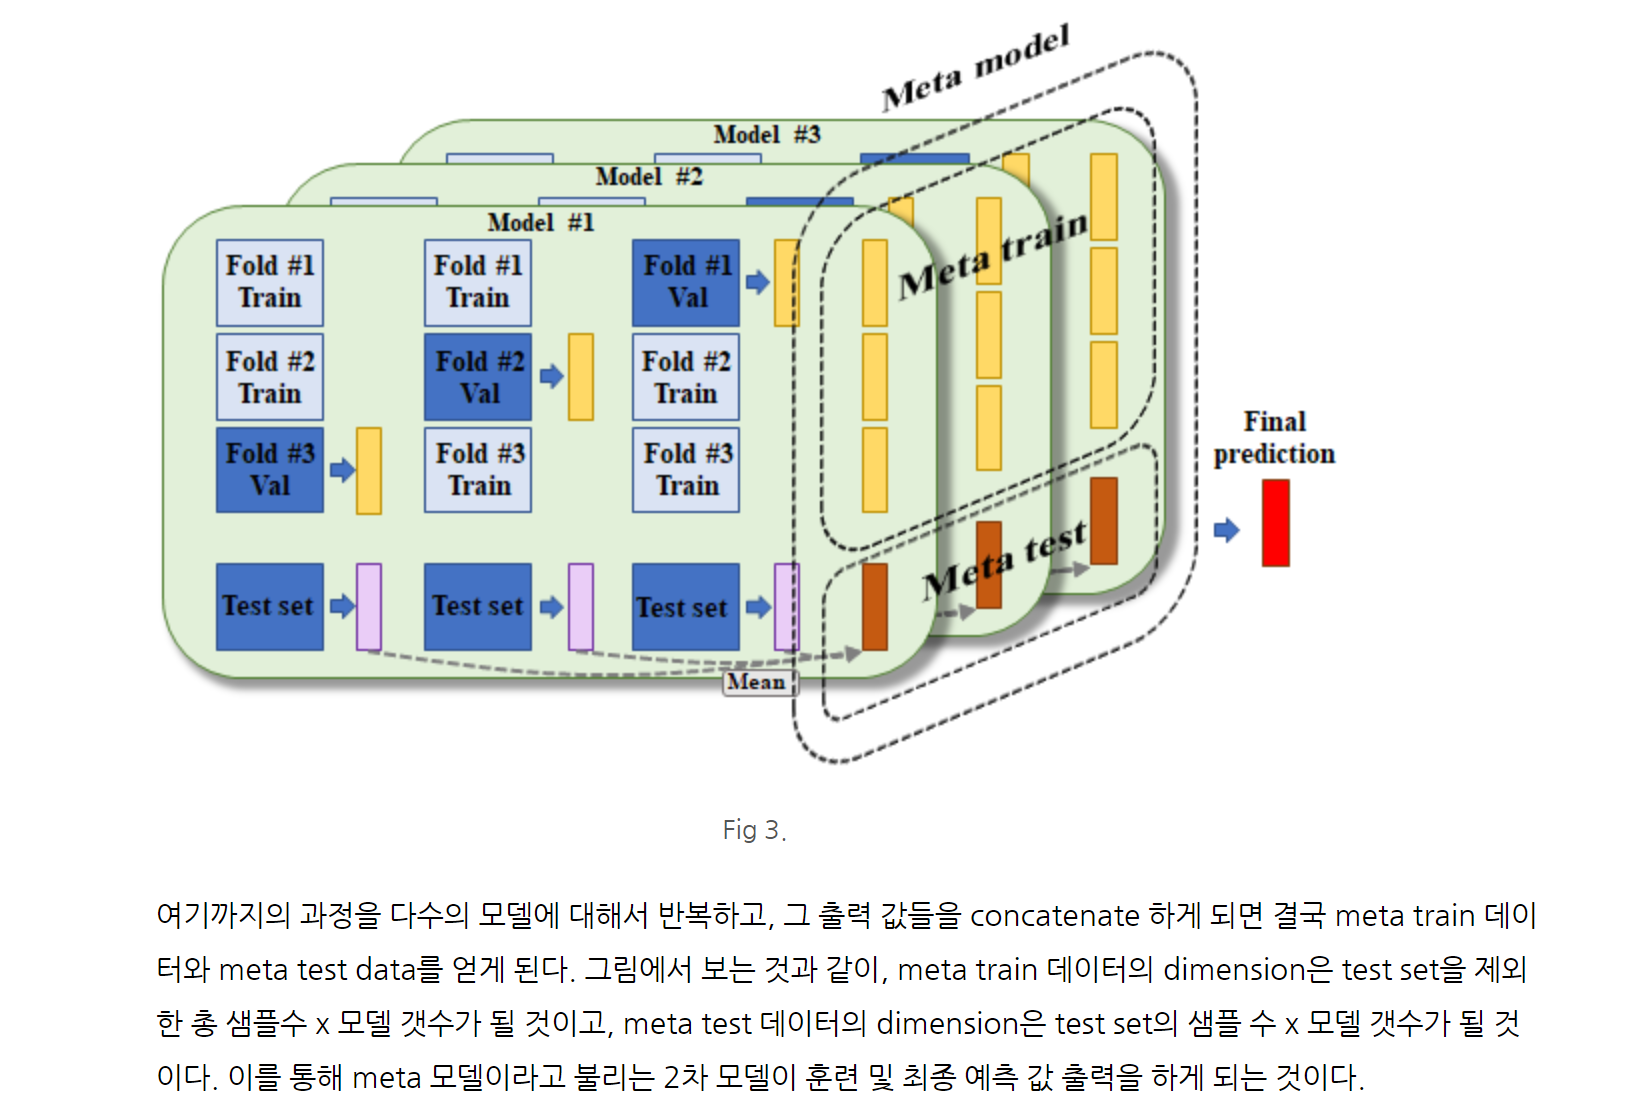

https://blog.naver.com/PostView.nhn?blogId=ckdgus1433&logNo=221588139765

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

val_scores = list()
# 결과 값들을 stacking 할것이기 때문에, (모델 개수, 샘플의 수, 클래스 개수) 라는 차원으로 구성됩니다.
oof_train = np.zeros((5, tmp_data.shape[0], le.classes_.shape[0]))
oof_pred  = np.zeros((5, tmp_test_data.shape[0], le.classes_.shape[0]))

for i, (trn_idx, val_idx) in enumerate(skf.split(tmp_data, tmp_label)):
    x_train, y_train = tmp_data.iloc[trn_idx, :], tmp_label[trn_idx,]
    x_valid, y_valid = tmp_data.iloc[val_idx, :], tmp_label[val_idx,]
    
    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, tmp_test_data)
    
    # 모델 정의
    clfs = [LogisticRegression(random_state=2021),
            SVC(probability=True, random_state=2021),
            RandomForestClassifier(random_state=2021),
            XGBClassifier(random_state=2021),
            LGBMClassifier(random_state=2021)]
            
    for j, clf in enumerate(clfs):
        # 모델 학습
        clf.fit(x_train, y_train)

        # 훈련, 검증 데이터 F1 score 확인
#         trn_f1 = f1_score(y_train, clf.predict(x_train))
#         val_f1 = f1_score(y_valid, clf.predict(x_valid))

        oof_train[j, val_idx, :] += clf.predict_proba(x_valid)
        oof_pred[j, :, :]        += clf.predict_proba(x_test) / 5
    
    print(f'{i} Fold, ...')

[19:00:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0 Fold, ...
[19:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1 Fold, ...
[19:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2 Fold, ...
[19:00:10] WARNING: C:/Users/Admin

In [26]:
oof_train[:, :, 1].shape

(5, 210)

In [27]:
oof_train[:, :, 1].T.shape

(210, 5)

In [28]:
# 모은 train, test의 예측 값을 new_x_train, new_x_test로 사용합니다.
new_train = pd.DataFrame(oof_train[:, :, 1].T)
new_test  = pd.DataFrame(oof_pred[:, :, 1].T)

In [29]:
new_train.shape, new_test.shape

((210, 5), (91, 5))

In [30]:
tmp_data.shape, tmp_test_data.shape

((210, 55), (91, 55))

#### OOF 앙상블을 진행합니다.

In [31]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

val_scores = list()
oof_pred  = np.zeros((tmp_test_data.shape[0], le.classes_.shape[0]))

for i, (trn_idx, val_idx) in enumerate(skf.split(new_train, tmp_label)):
    x_train, y_train = new_train.iloc[trn_idx, :], tmp_label[trn_idx,]
    x_valid, y_valid = new_train.iloc[val_idx, :], tmp_label[val_idx,]
    
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train     = scaler.transform(x_train)
    x_valid     = scaler.transform(x_valid)
    new_x_test  = scaler.transform(new_test)

    # 모델 정의
    clf = RandomForestClassifier(random_state=2021)
    
    # 모델 학습
    clf.fit(x_train, y_train)

    # 훈련, 검증 데이터 F1 score 확인
    trn_f1 = f1_score(y_train, clf.predict(x_train))
    val_f1 = f1_score(y_valid, clf.predict(x_valid))
    print('{} Fold, train f1_score : {:.5f}4, validation f1_score : {:.5f}'.format(i, trn_f1, val_f1))
    
    val_scores.append(val_f1)
    
    oof_pred[:, :]  += clf.predict_proba(new_x_test) / 5
    

# 교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.5f}'.format(np.mean(val_scores)))

# OOF temp Test F1 Score 계산하기
print('OOF Validation Score : {:.5f}'.format(f1_score(tmp_test_label, (oof_pred[:, 1] > 0.5).astype(np.int))))

0 Fold, train f1_score : 1.000004, validation f1_score : 0.97561
1 Fold, train f1_score : 1.000004, validation f1_score : 0.96296
2 Fold, train f1_score : 1.000004, validation f1_score : 0.97561
3 Fold, train f1_score : 1.000004, validation f1_score : 0.97561
4 Fold, train f1_score : 1.000004, validation f1_score : 0.98765
Cross Validation Score : 0.97549
OOF Validation Score : 0.97175
